# Wine Classification using MLP

## Load the dataset and split it

In [18]:
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

data = datasets.load_wine()
# convert sklearn dataset to pandas data frame
wine = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine.drop('target', axis=1)
y = wine['target']

sc = StandardScaler()
X =  sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Create the classifier, train and use it to predict the test set

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)


In [22]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [3]:
predictions = mlp.predict(X_test)

## Display some metrics and graphs

In [4]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[21  0  0]
 [ 0 20  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.91      1.00      0.95        20
         2.0       1.00      0.85      0.92        13

   micro avg       0.96      0.96      0.96        54
   macro avg       0.97      0.95      0.96        54
weighted avg       0.97      0.96      0.96        54



In [5]:
len(mlp.coefs_)

4

In [6]:
len(mlp.coefs_[0])

13

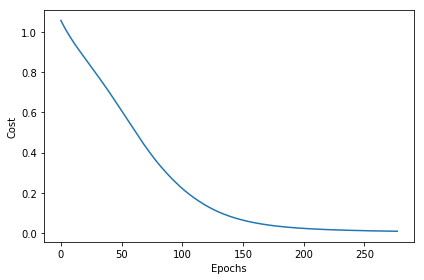

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(len(mlp.loss_curve_)), mlp.loss_curve_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score

model = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500)
scores = cross_val_score(model, X, y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94736842 1.         1.         0.94444444 0.94444444 0.94444444
 1.         1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.05)


In [11]:
from sklearn.model_selection import cross_val_score

model = MLPClassifier(hidden_layer_sizes=(50,100,50),max_iter=500)
scores = cross_val_score(model, X, y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1.         0.94444444 1.         0.94444444 1.         1.
 1.         1.         0.94117647 1.        ]
Accuracy: 0.98 (+/- 0.05)


In [9]:
from sklearn.model_selection import cross_val_score
model = MLPClassifier(hidden_layer_sizes=(13, 13, 13),max_iter=500)
scores = cross_val_score(model, X, y, cv=10)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.94736842 0.88888889 1.         0.94444444 1.         1.
 1.         1.         1.         1.        ]
Accuracy: 0.98 (+/- 0.07)
